<a href="https://colab.research.google.com/github/MarcelJonesRaymond/Neural-Network-and-Deep-Learning/blob/main/Intro_to_Nl_%26_DL_Week3_(MNIST)_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mnist dataset- Hyperparameter Optimization using Tensorflow


Importing the Libraries

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers
import warnings
warnings.filterwarnings('ignore')

Importing the data

In [7]:
(X_train,Y_train),(X_val,Y_val)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
print('Train data shape',X_train.shape)
print('Validation data shape',X_val.shape)

Train data shape (60000, 28, 28)
Validation data shape (10000, 28, 28)


Label:  2


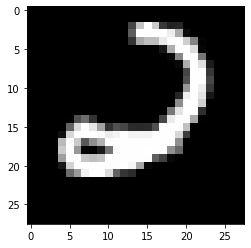

In [16]:
random_pic=np.random.randint(0,6000)
print('Label: ',Y_train[random_pic])
plt.imshow(X_train[random_pic],cmap='gray')

In [17]:
28*28

784

Reshape the data 

In [18]:
X_train=X_train.reshape(60000,784)
X_val=X_val.reshape(10000,784)

In [19]:
print('Train data shape',X_train.shape)
print('Validation data shape',X_val.shape)

Train data shape (60000, 784)
Validation data shape (10000, 784)


Normalization

In [20]:
print(X_train.max())
print(X_train.min())

255
0


In [21]:
X_train=X_train/255
X_val=X_val/255

In [22]:
print(X_train.max())
print(X_val.min())

1.0
0.0


One Hot Encode the Class vector

In [25]:
random_num=np.random.randint(0,60000)
print(Y_train[random_num])
Y_train=tf.keras.utils.to_categorical(Y_train,num_classes=10)
Y_val=tf.keras.utils.to_categorical(Y_val, num_classes=10)
print(Y_train[random_num])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Label:  7
Label:  7
Label:  9
Label:  0
Label:  3
Label:  6
Label:  8
Label:  4
Label:  8
Label:  9


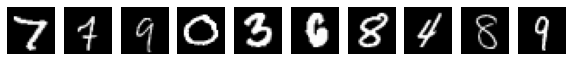

In [33]:
plt.figure(figsize=(10,5))
for i in range(0,10):
  plt.subplot(1,10,i+1)
  random_num1=np.random.randint(60000)
  plt.imshow(X_train[random_num1].reshape(28,28),cmap='gray')
  plt.axis('off')
  print('Label: ',np.argmax(Y_train[0:60000][random_num1]))
plt.show()

In [43]:
60000*(2/3)

40000.0

In [44]:
60000/256

234.375

Model 1

In [47]:
784/256

3.0625

In [58]:
model=Sequential()
model.add(Dense(256, input_shape=(784,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [66]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [67]:
model.fit(X_train,Y_train,batch_size=500,epochs=10, verbose=1,validation_split=0.3)

Epoch 1/10
84/84 [==============================] - 2s 22ms/step - loss: 0.2760 - accuracy: 0.9208 - val_loss: 0.2730 - val_accuracy: 0.9227
Epoch 2/10
84/84 [==============================] - 2s 18ms/step - loss: 0.2729 - accuracy: 0.9220 - val_loss: 0.2703 - val_accuracy: 0.9237
Epoch 3/10
84/84 [==============================] - 2s 18ms/step - loss: 0.2699 - accuracy: 0.9230 - val_loss: 0.2678 - val_accuracy: 0.9245
Epoch 4/10
84/84 [==============================] - 2s 18ms/step - loss: 0.2669 - accuracy: 0.9240 - val_loss: 0.2653 - val_accuracy: 0.9252
Epoch 5/10
84/84 [==============================] - 2s 18ms/step - loss: 0.2641 - accuracy: 0.9248 - val_loss: 0.2634 - val_accuracy: 0.9253
Epoch 6/10
84/84 [==============================] - 2s 18ms/step - loss: 0.2613 - accuracy: 0.9255 - val_loss: 0.2610 - val_accuracy: 0.9261
Epoch 7/10
84/84 [==============================] - 2s 18ms/step - loss: 0.2587 - accuracy: 0.9261 - val_loss: 0.2589 - val_accuracy: 0.9267
Epoch 8/10
84

In [68]:
model=Sequential()
model.add(Dense(256, input_shape=(784,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size=500,epochs=10, verbose=1,validation_split=0.3)

Epoch 1/10
84/84 [==============================] - 2s 22ms/step - loss: 0.5013 - accuracy: 0.8633 - val_loss: 0.2262 - val_accuracy: 0.9336
Epoch 2/10
84/84 [==============================] - 2s 19ms/step - loss: 0.1803 - accuracy: 0.9475 - val_loss: 0.1640 - val_accuracy: 0.9514
Epoch 3/10
84/84 [==============================] - 2s 19ms/step - loss: 0.1244 - accuracy: 0.9640 - val_loss: 0.1366 - val_accuracy: 0.9605
Epoch 4/10
84/84 [==============================] - 2s 19ms/step - loss: 0.0926 - accuracy: 0.9735 - val_loss: 0.1197 - val_accuracy: 0.9629
Epoch 5/10
84/84 [==============================] - 2s 18ms/step - loss: 0.0714 - accuracy: 0.9790 - val_loss: 0.1239 - val_accuracy: 0.9629
Epoch 6/10
84/84 [==============================] - 2s 19ms/step - loss: 0.0564 - accuracy: 0.9833 - val_loss: 0.1054 - val_accuracy: 0.9685
Epoch 7/10
84/84 [==============================] - 2s 19ms/step - loss: 0.0430 - accuracy: 0.9876 - val_loss: 0.0966 - val_accuracy: 0.9716
Epoch 8/10
84

In [69]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
model=Sequential()
model.add(Dense(256, input_shape=(784,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size=500,epochs=10, verbose=1,validation_split=0.3,callbacks=[early_stopping])

Epoch 1/10
84/84 [==============================] - 2s 21ms/step - loss: 0.5103 - accuracy: 0.8639 - val_loss: 0.2397 - val_accuracy: 0.9289
Epoch 2/10
84/84 [==============================] - 2s 19ms/step - loss: 0.1856 - accuracy: 0.9459 - val_loss: 0.1668 - val_accuracy: 0.9516
Epoch 3/10
84/84 [==============================] - 2s 19ms/step - loss: 0.1265 - accuracy: 0.9633 - val_loss: 0.1352 - val_accuracy: 0.9610
Epoch 4/10
84/84 [==============================] - 2s 18ms/step - loss: 0.0956 - accuracy: 0.9724 - val_loss: 0.1172 - val_accuracy: 0.9663
Epoch 5/10
84/84 [==============================] - 2s 18ms/step - loss: 0.0733 - accuracy: 0.9785 - val_loss: 0.1103 - val_accuracy: 0.9676
Epoch 6/10
84/84 [==============================] - 2s 19ms/step - loss: 0.0578 - accuracy: 0.9829 - val_loss: 0.0980 - val_accuracy: 0.9708
Epoch 7/10
84/84 [==============================] - 2s 19ms/step - loss: 0.0452 - accuracy: 0.9870 - val_loss: 0.1005 - val_accuracy: 0.9702
Epoch 8/10
84

MOdel -2

In [76]:
def function(lr):
  model=Sequential()
  model.add(Dense(256,input_shape=(784,),activation='relu'))
  model.add(Dense(256,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  sgd=optimizers.SGD(learning_rate=lr,decay=1e-6,momentum=0.9)
  model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
  model.fit(X_train,Y_train,validation_split=0.3,batch_size=100, epochs=10,verbose=1)
  return model.evaluate(X_test,Y_test)

In [77]:
function(0.1)

Epoch 1/10
420/420 [==============================] - 4s 8ms/step - loss: 0.2796 - accuracy: 0.9133 - val_loss: 0.1361 - val_accuracy: 0.9574
Epoch 2/10
420/420 [==============================] - 3s 7ms/step - loss: 0.1051 - accuracy: 0.9670 - val_loss: 0.1261 - val_accuracy: 0.9614
Epoch 3/10
420/420 [==============================] - 3s 7ms/step - loss: 0.0752 - accuracy: 0.9765 - val_loss: 0.1096 - val_accuracy: 0.9671
Epoch 4/10
420/420 [==============================] - 3s 7ms/step - loss: 0.0478 - accuracy: 0.9843 - val_loss: 0.1217 - val_accuracy: 0.9659
Epoch 5/10
420/420 [==============================] - 3s 7ms/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.1118 - val_accuracy: 0.9704
Epoch 6/10
420/420 [==============================] - 3s 7ms/step - loss: 0.0350 - accuracy: 0.9886 - val_loss: 0.1111 - val_accuracy: 0.9717
Epoch 7/10
420/420 [==============================] - 3s 7ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.1001 - val_accuracy: 0.9750
Epoch 

[0.09154105186462402, 0.9789999723434448]

Full Model

In [88]:
def function(lr,lambdaa):
  model=Sequential()
  model.add(Dense(256,input_shape=(784,),activation='relu'))
  model.add(Dense(256,activation='relu'))
  model.add(Dense(10,activation='softmax',kernel_regularizer=regularizers.l2(lambdaa)))
  sgd=optimizers.SGD(learning_rate=lr,decay=1e-6,momentum=0.9)
  model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
  model.fit(X_train,Y_train,validation_split=0.3,batch_size=100, epochs=100,verbose=1)
  return model.evaluate(X_test,Y_test)

In [89]:
function(2e-2,1e-4)

Epoch 1/100
420/420 [==============================] - 4s 7ms/step - loss: 0.3930 - accuracy: 0.8858 - val_loss: 0.1996 - val_accuracy: 0.9438
Epoch 2/100
420/420 [==============================] - 3s 7ms/step - loss: 0.1612 - accuracy: 0.9533 - val_loss: 0.1595 - val_accuracy: 0.9527
Epoch 3/100
420/420 [==============================] - 3s 7ms/step - loss: 0.1116 - accuracy: 0.9694 - val_loss: 0.1231 - val_accuracy: 0.9662
Epoch 4/100
420/420 [==============================] - 3s 7ms/step - loss: 0.0882 - accuracy: 0.9760 - val_loss: 0.1081 - val_accuracy: 0.9694
Epoch 5/100
420/420 [==============================] - 3s 7ms/step - loss: 0.0678 - accuracy: 0.9815 - val_loss: 0.1103 - val_accuracy: 0.9702
Epoch 6/100
420/420 [==============================] - 3s 7ms/step - loss: 0.0566 - accuracy: 0.9852 - val_loss: 0.0970 - val_accuracy: 0.9730
Epoch 7/100
420/420 [==============================] - 3s 7ms/step - loss: 0.0465 - accuracy: 0.9885 - val_loss: 0.0970 - val_accuracy: 0.9728

[0.07723972946405411, 0.980400025844574]